In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pywt
import seaborn as sns
import scaleogram as scg 
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
from mat4py import loadmat
from scipy.fftpack import fft

import os

In [3]:
# set working dir
working_dir = 'H:/UGA MASTERS/VDS_CCS_Project/wavelet'
os.chdir(working_dir)

FileNotFoundError: [Errno 2] No such file or directory: 'H:/UGA MASTERS/VDS_CCS_Project/wavelet'

In [4]:
# source : 'https://www.mathworks.com/help/wavelet/examples/signal-classification-with-wavelet-analysis-and-convolutional-neural-networks.html'
# Create list of data and labels from dictionary
data = loadmat("./data/ECGData/ECGData.mat")

ecg_total = len(data['ECGData']['Data'])
ecg_data = []
ecg_labels = []
for i in range(0, ecg_total):
    ecg_data.append(data['ECGData']['Data'][i])
    ecg_labels.append(data['ECGData']['Labels'][i])

flat_list_ecg_labels = [item for sublist in ecg_labels for item in sublist]

FileNotFoundError: [Errno 2] No such file or directory: './data/ECGData/ECGData.mat'

NameError: name 'data' is not defined

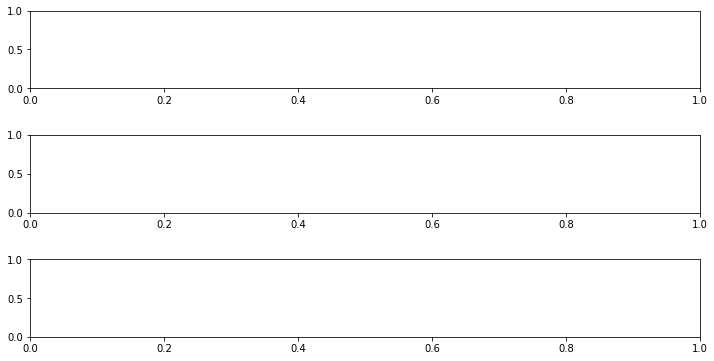

In [5]:
# Data Visualization

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(3, 1, hspace=0.6)

arr_signal = fig.add_subplot(grid[0, 0])
chg_signal = fig.add_subplot(grid[1, 0])
nsr_signal = fig.add_subplot(grid[2, 0])

arr_signal.plot(range(0, len(data['ECGData']['Data'][33]), 1), ecg_data[33], color = 'blue')
arr_signal.set_xlim(0, 1000)
arr_signal.set_title('ARR Signal')

chg_signal.plot(range(0, len(data['ECGData']['Data'][100]), 1), ecg_data[100], color = 'red')
chg_signal.set_xlim(0, 1000)
chg_signal.set_title('CHG Signal')

nsr_signal.plot(range(0, len(data['ECGData']['Data'][150]), 1), ecg_data[150], color = 'green')
nsr_signal.set_xlim(0, 1000)
nsr_signal.set_title('NSR Signal')

#fig.savefig('Figure_1.png')   # save the figure to file
#plt.close(fig)

In [6]:
#Sythetic data generation and FFT 

N = 10000
x_values = np.linspace(0, 100, N)
amplitudes = [4, 1.5, 9]
frequencies = [2, 5, 3]
y_values_0 = amplitudes[0]*np.cos(2*np.pi*frequencies[0]*x_values) 
y_values_1 = amplitudes[1]*np.sin(2*np.pi*frequencies[1]*x_values) 
y_values_2 = amplitudes[2]*np.cos(2*np.pi*frequencies[2]*x_values + 0.4) 
    

full_signal_values = (y_values_0 + y_values_1 - y_values_2)
full_signal_fft_values = fft(full_signal_values)
full_signal_fft_values = (2/N) * np.abs(full_signal_fft_values)

Text(8, 3, 'Second\ncomponent')

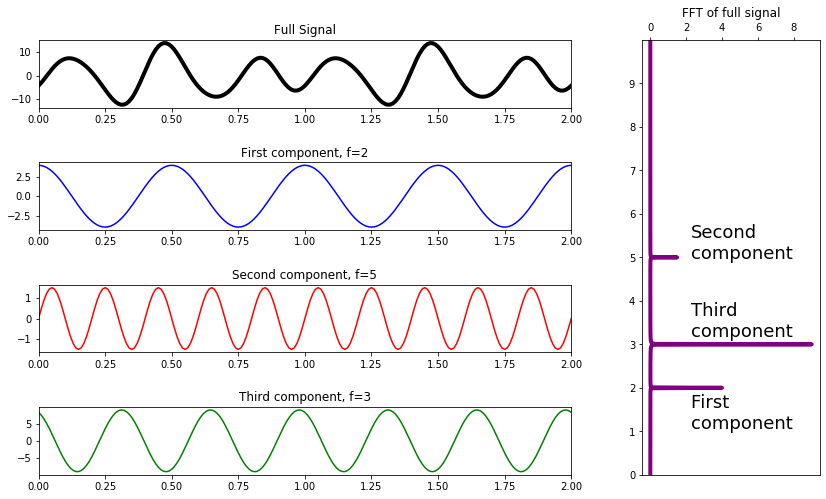

In [7]:
# Plot FFT results of synthetic data

fig = plt.figure(figsize=(14, 8))
widths = [3, 1]
heights = [1, 1, 1, 1]
grid = plt.GridSpec(4, 2, wspace=0.2, hspace=0.8, width_ratios=widths, height_ratios=heights)

full_signal = fig.add_subplot(grid[0, 0])
first_comp = fig.add_subplot(grid[1, 0])
second_comp = fig.add_subplot(grid[2, 0])
third_comp = fig.add_subplot(grid[3, 0])
fft_result = fig.add_subplot(grid[0:, 1])

#Synthetic data
full_signal.plot(list(x_values), list(full_signal_values), color='black', linewidth=4)
full_signal.set_xlim(0, 2)
full_signal.set_title('Full Signal')
first_comp.plot(list(x_values), list(y_values_0), color = 'blue')
first_comp.set_xlim(0, 2)
first_comp.set_title('First component, f=2')
second_comp.plot(list(x_values), list(y_values_1), color = 'red')
second_comp.set_xlim(0, 2)
second_comp.set_title('Second component, f=5')
third_comp.plot(list(x_values), list(y_values_2), color = 'green')
third_comp.set_xlim(0, 2)
third_comp.set_title('Third component, f=3')

#FFT
fft_result.xaxis.tick_top()
fft_result.plot(list(full_signal_fft_values), list(x_values), color = 'purple', linewidth=4)
fft_result.set_ylim(0, 10)
fft_result.set_yticks(np.arange(0, 10, step=1))
fft_result.set_title('FFT of full signal')
fft_result.annotate('First\ncomponent',
            xy=(1.8, 1), xycoords='data',
            xytext=(8, 3), textcoords='offset points',
            size=18)
fft_result.annotate('Third\ncomponent',
            xy=(1.8, 3.1), xycoords='data',
            xytext=(8, 3), textcoords='offset points',
            size=18)

fft_result.annotate('Second\ncomponent',
            xy=(1.8, 4.9), xycoords='data',
            xytext=(8, 3), textcoords='offset points',
            size=18)

#fig.savefig('Figure_2.png')   # save the figure to file
#plt.close(fig)

Text(0.5, 1.0, 'FFT of full signal')

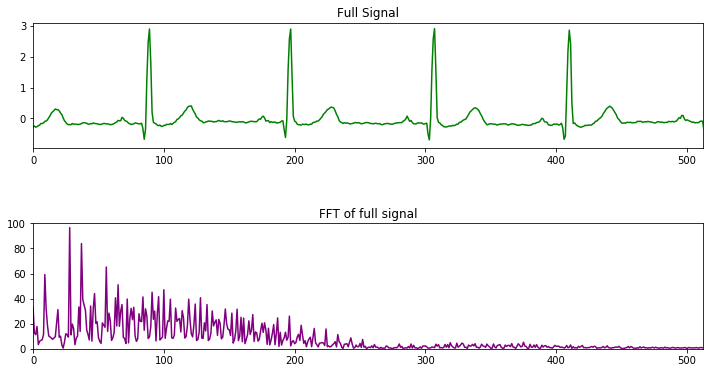

In [8]:
#Arr signal Fourier Transform
nn = 160
signal_length = 1000
full_signal_fft_values = np.abs(fft(ecg_data[nn][:signal_length]))
x_values_fft = range(0, len(data['ECGData']['Data'][nn]), 1)[:signal_length]

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(2, 1,hspace=0.6)

full_signal = fig.add_subplot(grid[0, 0])
fft_comp = fig.add_subplot(grid[1, 0])

full_signal.plot(x_values_fft, ecg_data[nn][:signal_length], color = 'green')
full_signal.set_xlim(0, 512)
full_signal.set_title('Full Signal')
fft_comp.plot(x_values_fft, list(full_signal_fft_values), color = 'purple')
fft_comp.set_xlim(0, 512)
fft_comp.set_ylim(0, 100)
fft_comp.set_title('FFT of full signal')

#fig.savefig('Figure_3.png')   # save the figure to file
#plt.close(fig)

"""
In contrast to the very well defined set of frequencies obtained with synthetic data, 
in Fig. 4 the FT is less clear, we managed to identify some peaks but in some intervals 
they are not sharp. Why Fourier is not able to break down the signal clearly? To answer 
this we should pay attention to time. In the synthetic case we have a signal composed by 
three frequencies, and these frequencies are fixed on time, they do not vary. Fourier 
transform works when no variation in time happens, when we are in the frequency-domain 
we lose this dependency. In some way we can think of the Fourier transform as a trade-off 
between time information and frequency information. By taking a FT of a time signal, all 
time information is lost in return for frequency information. Our ECG signal is full of 
frequencies that vary on time, that is the reason why we can not resolve it clearly in 
frequency domain
"""

""
wavelet decomposition uses a time-localized oscillatory function as the analyzing or 
mother wavelet, as shown in Figure 5
""

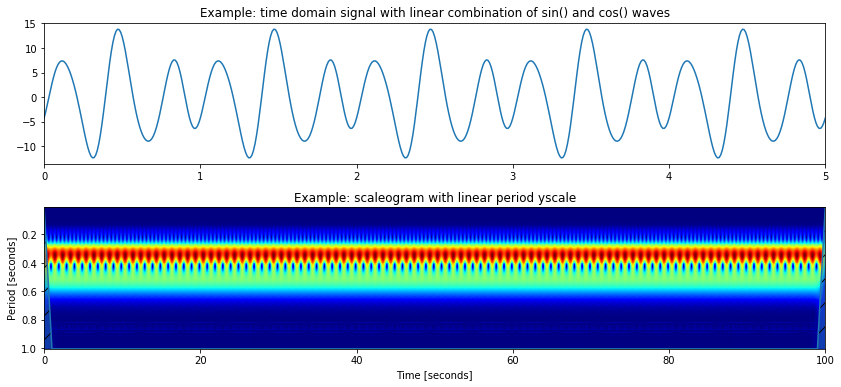

In [9]:
# Example of Wavelet transform for Synthetic data
N = 10000
x_values_wvt = np.linspace(0, 100, N)
amplitudes = [4, 1.5, 9]
frequencies = [2, 5, 3]
y_values_0 = amplitudes[0]*np.cos(2*np.pi*frequencies[0]*x_values) 
y_values_1 = amplitudes[1]*np.sin(2*np.pi*frequencies[1]*x_values) 
y_values_2 = amplitudes[2]*np.cos(2*np.pi*frequencies[2]*x_values + 0.4) 
full_signal_values = (y_values_0 + y_values_1 - y_values_2)

wavelet='cmor0.7-1.5'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6))
fig.subplots_adjust(hspace=0.3)
ax1.plot(x_values_wvt, full_signal_values); ax1.set_xlim(0, 5)
ax1.set_title('Example: time domain signal with linear combination of sin() and cos() waves')
ax2 = scg.cws(x_values_wvt, full_signal_values, scales=np.arange(1, 150), wavelet=wavelet,
        ax=ax2, cmap="jet", cbar=None, ylabel="Period [seconds]", xlabel="Time [seconds]",
        title='Example: scaleogram with linear period yscale')

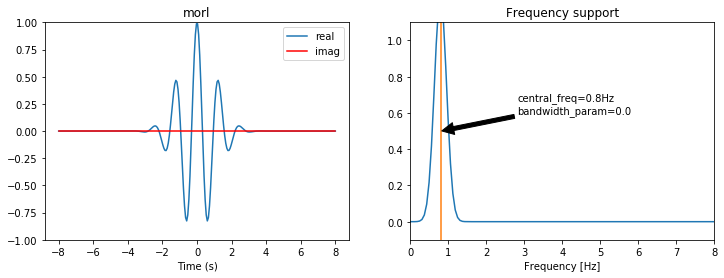

In [10]:
#Morlet wavelet
axes = scg.plot_wav('morl', figsize=(12,4))

In [11]:
pywt.families(False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

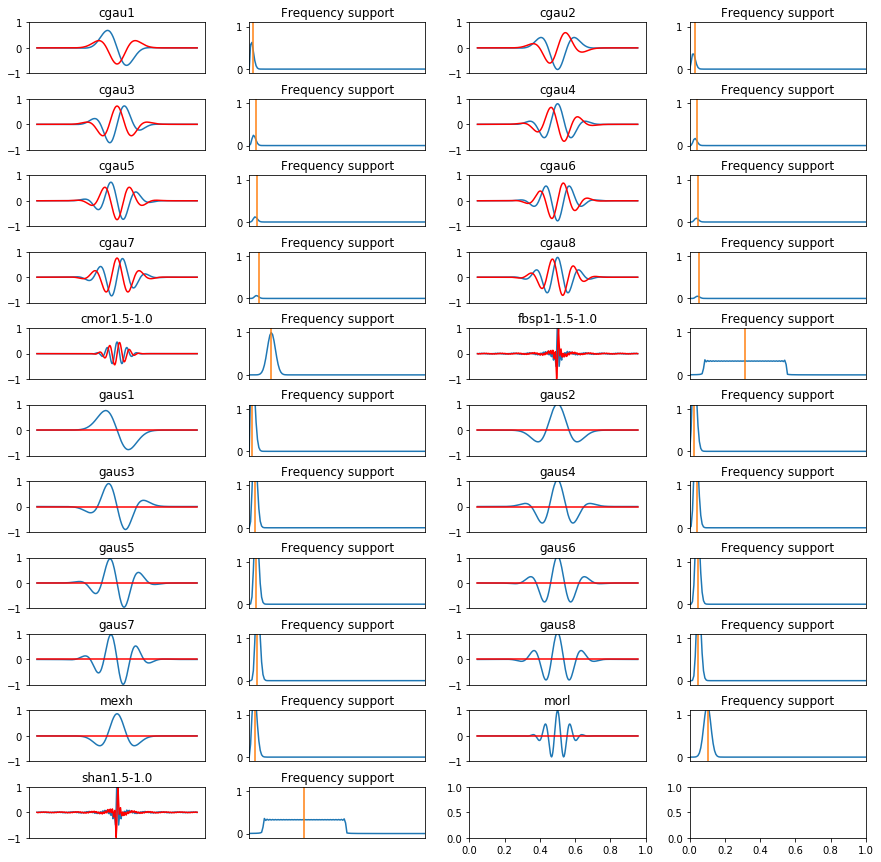

In [19]:
len(ecg_data[33])

65536

In [20]:
range(0,len(ecg_data[nn]),1)

range(0, 65536)

In [21]:
scg.periods2scales( np.arange(1, 128+1))

array([  1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,  13.5,
        15. ,  16.5,  18. ,  19.5,  21. ,  22.5,  24. ,  25.5,  27. ,
        28.5,  30. ,  31.5,  33. ,  34.5,  36. ,  37.5,  39. ,  40.5,
        42. ,  43.5,  45. ,  46.5,  48. ,  49.5,  51. ,  52.5,  54. ,
        55.5,  57. ,  58.5,  60. ,  61.5,  63. ,  64.5,  66. ,  67.5,
        69. ,  70.5,  72. ,  73.5,  75. ,  76.5,  78. ,  79.5,  81. ,
        82.5,  84. ,  85.5,  87. ,  88.5,  90. ,  91.5,  93. ,  94.5,
        96. ,  97.5,  99. , 100.5, 102. , 103.5, 105. , 106.5, 108. ,
       109.5, 111. , 112.5, 114. , 115.5, 117. , 118.5, 120. , 121.5,
       123. , 124.5, 126. , 127.5, 129. , 130.5, 132. , 133.5, 135. ,
       136.5, 138. , 139.5, 141. , 142.5, 144. , 145.5, 147. , 148.5,
       150. , 151.5, 153. , 154.5, 156. , 157.5, 159. , 160.5, 162. ,
       163.5, 165. , 166.5, 168. , 169.5, 171. , 172.5, 174. , 175.5,
       177. , 178.5, 180. , 181.5, 183. , 184.5, 186. , 187.5, 189. ,
       190.5, 192. ]

Default wavelet function used to compute the transform: morl ( Morlet wavelet )


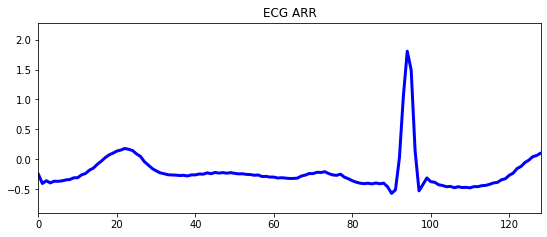

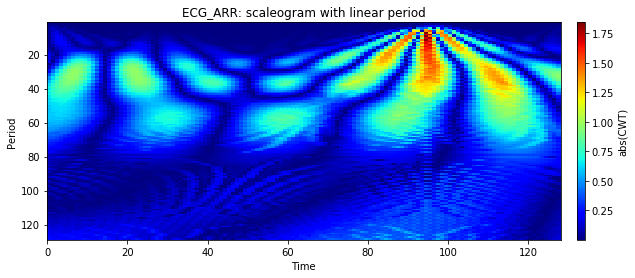

In [16]:
# choose default wavelet function 
scg.set_default_wavelet('morl')

nn = 33
signal_length = 128
# range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, signal_length+1) )
x_values_wvt_arr = range(0,len(ecg_data[nn]),1)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3.5));  
ax1.plot(x_values_wvt_arr, ecg_data[nn], linewidth=3, color='blue')
ax1.set_xlim(0, signal_length)
ax1.set_title("ECG ARR")

# the scaleogram
scg.cws(ecg_data[nn][:signal_length], scales=scales, figsize=(10, 4.0), coi = False, ylabel="Period", xlabel="Time",
        title='ECG_ARR: scaleogram with linear period'); 

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")

In [17]:
#Preparing data
arr_list = ecg_data[0:95]
chf_list = ecg_data[96:125]
nsr_list = ecg_data[126:162]

arr_split_256 = [np.array_split(arr_list[ii], 256) for ii in range(95)]
arr_flatten = [item for sublist in arr_split_256 for item in sublist]

chf_split_256 = [np.array_split(chf_list[ii], 256) for ii in range(29)]
chf_flatten = [item for sublist in chf_split_256 for item in sublist]

nsr_split_256 = [np.array_split(nsr_list[ii], 256) for ii in range(36)]
nsr_flatten = [item for sublist in nsr_split_256 for item in sublist]

In [18]:
arr_flatten

[array([-0.0978573 , -0.15688126, -0.13781616, -0.13717675, -0.14768441,
        -0.16852238, -0.17589063, -0.1702357 , -0.18113116, -0.14647096,
        -0.21243584, -0.2396996 , -0.27164838, -0.26657602, -0.26871976,
        -0.29066696, -0.29168858, -0.29048786, -0.27620179, -0.29806224,
        -0.28777059, -0.3107294 , -0.35513941, -0.40845323, -0.48197063,
        -0.3075817 ,  0.16044892,  0.78238703,  0.58040234, -0.28557382,
        -0.40549133, -0.32406989, -0.33728482, -0.3110322 , -0.33590696,
        -0.33462212, -0.33236978, -0.32827805, -0.34787459, -0.31558907,
        -0.32616658, -0.33877811, -0.35250378, -0.3331307 , -0.33760064,
        -0.33032531, -0.33188352, -0.33490986, -0.34856962, -0.34389001,
        -0.32692086, -0.33743948, -0.33688453, -0.35016104, -0.3333079 ,
        -0.34851661, -0.33423833, -0.35082987, -0.34578656, -0.34845286,
        -0.3605081 , -0.37067881, -0.36707339, -0.36367549, -0.36939929,
        -0.36229697, -0.35710326, -0.32554987, -0.3

In [19]:
reduce_size = 500
full_1500 = (arr_flatten[0:reduce_size] + chf_flatten[0:reduce_size] + nsr_flatten[0:reduce_size])

In [20]:
# create the data set
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


fs = len(full_1500[0])
sgn_length = 2000   #65536   Pay atention with ram memory! 
size_dataset = len(full_1500)
scales = range(1, fs)
waveletname = 'morl'
 
X_full = np.ndarray(shape=(size_dataset, fs-1, fs-1, 3))
                 
for i in range(0, size_dataset):
    if i % 500 == 0:
        print (i, 'done!')
    for j in range(0, 3):
        signal = full_1500[i]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        X_full[i, :, :, j] = coeff[:,:fs-1]

0 done!
500 done!
1000 done!


In [21]:

list_ecg_labels_arr = ['ARR']*reduce_size 
list_ecg_labels_chf = ['CHF']*reduce_size 
list_ecg_labels_nsr = ['NSR']*reduce_size 
list_ecg_labels = (list_ecg_labels_arr + list_ecg_labels_chf + list_ecg_labels_nsr)

le = preprocessing.LabelEncoder()
ecg_labels_encoded = le.fit_transform(list_ecg_labels)
X_train, X_test, y_train, y_test = train_test_split(X_full, ecg_labels_encoded, test_size=0.25, random_state=42)

In [23]:
import sys
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#Inspecting DATA
n_rows = 3
n_cols = 5
class_names = ['ARR', 'CHF', 'NSR']
plt.figure(figsize=(n_cols*1.5, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow((X_train[index]*255).astype(np.uint8), cmap="binary", interpolation="spline36")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

In [ ]:
# Defining basic NN
num_filter, num_classes = 3, 3
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[fs-1, fs-1, num_filter]),
    keras.layers.Dense(300, activation="relu"),                 
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(num_classes, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('epochs', size = 16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig('Figure_epochs.png')   
    plt.close()

In [ ]:
plot_learning_curves(history)